# **Tensor Flow**

[Tensor Flow Course 1 - Youtube](https://www.youtube.com/watch?v=tPYj3fFJGjk)  |   [Tensor Flow Course 2 - Youtube](https://www.youtube.com/watch?v=tpCFfeUEGs8&list=PL6vjgQ2-qJFfU2vF6-lG9DlSa4tROkzt9&index=1&t=115s)



---

## What is TensorFlow?

[TensorFlow](https://www.tensorflow.org/) is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

## Why use TensorFlow?

Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.




# **Ch-01: Tensor Flow Fundamentals**

In [ ]:
import tensorflow as tf
print(tf.__version__)


### Creating Tensors with `tf.constant()`

As mentioned before, in general, you usually won't create tensors yourself. This is because TensorFlow has modules built-in (such as [`tf.io`](https://www.tensorflow.org/api_docs/python/tf/io) and [`tf.data`](https://www.tensorflow.org/guide/data)) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.

But for now, because we're getting familar with tensors themselves and how to manipulate them, we'll see how we can create them ourselves.

We'll begin by using [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant).

In [ ]:
scalar = tf.constant(7)
scalar

In [ ]:
scalar.ndim

In [ ]:
vector = tf.constant([10,10])
vector

In [ ]:
vector.ndim

In [ ]:
matrix = tf.constant([[1,2,3],
                      [5,6,8]])
matrix

In [ ]:
matrix.ndim

In [ ]:
another_matrix = tf.constant([[12.,2,5.],
                              [34,7,1]])
another_matrix

In [ ]:
another_matrix.ndim

In [ ]:
another_matrix2= tf.constant([[12.,2,5.],
                              [34,7,1],
                              [5,3,1]], dtype=tf.float16)
another_matrix2

In [ ]:
another_matrix2.ndim

In [ ]:
tensor = tf.constant([[[1,2,3],
                       [4,5,6],
                       [5,6,7]]])
tensor

In [ ]:
tensor.ndim

> 🔑 **Note:** For now, you don't need to know too much about the different ranks of tensors (but we will see more on this later). The important point is knowing tensors can have an unlimited range of dimensions (the exact amount will depend on what data you're representing).

### Creating Tensors with `tf.Variable()`

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using [`tf.Variable()`](https://www.tensorflow.org/api_docs/python/tf/Variable).

The difference between `tf.Variable()` and `tf.constant()` is tensors created with `tf.constant()` are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()` are mutable (can be changed).

In [ ]:
changeabletensor = tf.Variable([10,6])
unchangeabletensor = tf.constant([10,6])
changeabletensor, unchangeabletensor


In [ ]:
changeabletensor[0]

In [ ]:
changeabletensor[0] = 5

In [ ]:
changeabletensor[0].assign(4)

In [ ]:
unchangeabletensor[0] = 7

In [ ]:
unchangeabletensor[0].assign(4)

Which one should you use? `tf.constant()` or `tf.Variable()`?

It will depend on what your problem requires. However, most of the time, TensorFlow will automatically choose for you (when loading data or modelling data).

### Creating random tensors

Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors?

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).

**How a network learns**
![how a network learns](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/00-how-a-network-learns.png)
*A network learns by starting with random patterns (1) then going through demonstrative examples of data (2) whilst trying to update its random patterns to represent the examples (3).*

We can create random tensors by using the [`tf.random.Generator`](https://www.tensorflow.org/guide/random_numbers#the_tfrandomgenerator_class) class.

In [ ]:
# creating random tensors
random_1 = tf.random.Generator.from_seed(7)
random_1 = random_1.normal(shape=(3,2))
random_1
random_2 = tf.random.Generator.from_seed(7)
random_2 = random_2.normal(shape=(3,2))
random_1, random_2, random_1 == random_2

In [ ]:
# shuffle the order of elements in a tensor
not_shuffled = tf.constant([[12,7],
                            [2,3],
                            [6,7]])
tf.random.shuffle(not_shuffled)

In [ ]:
s# shuffle
tf.random.set_seed(42) # global random seed
tf.random.shuffle(not_shuffled, seed=42)

The random tensors we've made are actually [pseudorandom numbers](https://www.computerhope.com/jargon/p/pseudo-random.htm) (they appear as random, but really aren't).

If we set a seed we'll get the same random numbers (if you've ever used NumPy, this is similar to `np.random.seed(42)`).

Setting the seed says, "hey, create some random numbers, but flavour them with X" (X is the seed).

What do you think will happen when we change the seed?


It's due to rule #4 of the [`tf.random.set_seed()`](https://www.tensorflow.org/api_docs/python/tf/random/set_seed) documentation.

> "4. If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

`tf.random.set_seed(42)` sets the global seed, and the `seed` parameter in `tf.random.shuffle(seed=42)` sets the operation seed.

Because, "Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."

In [ ]:
tf.ones([10,7])

In [ ]:
tf.zeros([5,5])

In [ ]:
tf.zeros(shape=(5,5))

In [ ]:
# turn numpy array into tensors
# diff between them that tensor run on gpu
import numpy as np

np_a = np.arange(1,25, dtype=np.int32)
np_a

In [ ]:
a = tf.constant(np_a)
a

In [ ]:
a = tf.constant(np_a, shape=(2,3,4))
a

In [ ]:
# getting information from tensor
    # shape
    # axis of dim
    # Rank
    # size

In [ ]:
# rank is dim

rank_4 = tf.zeros(shape= (2,3,4,5))
rank_4

In [ ]:
rank_4[0]

In [ ]:
rank_4.ndim, rank_4.shape, tf.size(rank_4)

In [ ]:
# get varios attribute
# Get various attributes of tensor
print("Datatype of every element:", rank_4.dtype)
print("Number of dimensions (rank):", rank_4.ndim)
print("Shape of tensor:", rank_4.shape)
print("Elements along axis 0 of tensor:", rank_4.shape[0])
print("Elements along last axis of tensor:", rank_4.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4).numpy()) # .numpy() converts to NumPy array

In [ ]:
# indexing  tensors

rank_4[:2,:2,:2,:2]

In [ ]:
rank_4[:1]

In [ ]:
rank_4[:1,:1,:1]

In [ ]:
rank_4[:1,:1,:1,:1]

In [ ]:
rank_4[:1,:1,:,:1]

In [ ]:
rank_4[:1,:,:,:1]

In [ ]:
rank_2 = tf.constant([[1,2],
                     [4,5]])
rank_2

In [ ]:
some_list = [1,2,3,4]

In [ ]:
some_list, some_list[-1]

In [ ]:
# get last item of each of row of our 2 tensor
rank_2[:,-1]


You can also add dimensions to your tensor whilst keeping the same information present using `tf.newaxis`.

In [ ]:
rank_3 = tf.zeros(shape=(2,2,2))
rank_3.ndim

In [ ]:
rank_3

In [ ]:
rank_2

In [ ]:
rank_3 = rank_2[..., tf.newaxis]
rank_3

In [ ]:
tf.expand_dims(rank_2, axis=1)

In [ ]:
tf.expand_dims(rank_2, axis=-1)

> #### manipulating tensors


In [ ]:
tensor = tf.constant([[20,7], [3,4]])
tensor +10

In [ ]:
tensor = tensor+10
tensor

In [ ]:
tf.multiply(tensor, 10) ## this technique faster on GPU that the tradition way

In [ ]:
tensor = tensor * (-10)
tensor

In [ ]:
tf.math.abs(tensor)

In [ ]:
# matrix multiplication

In [ ]:
tensor2 = tf.linalg.matmul(tensor, tensor)
tensor2

In [ ]:
# wise element
tensor * tensor

In [ ]:
tensor @ tensor

In [ ]:
tensor3 = tf.constant([[1,2],[3,4],[5,6]])
tensor4 = tf.constant([[4,5],[8,9],[1,3]])
tensor3, tensor4


In [ ]:
tensor3 @ tensor4


In [ ]:
tensor3 * tensor4


In [ ]:
tf.matmul(tensor3 ,tensor4)


In [ ]:
# change shape
tf.reshape(tensor3, shape=(2,3))

In [ ]:
tensor3.shape

In [ ]:
tensor4.shape

In [ ]:
tensor4 = tf.reshape(tensor4, shape=(2,3))

In [ ]:
tensor4.shape

In [ ]:
tensor3 @ tensor4


As you can see, the outputs of `tf.reshape()` and `tf.transpose()` when called on `Y`, even though they have the same shape, are different.

This can be explained by the default behaviour of each method:
* [`tf.reshape()`](https://www.tensorflow.org/api_docs/python/tf/reshape) - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
* [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose) - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the [`perm` parameter](https://www.tensorflow.org/api_docs/python/tf/transpose).


---
> ### Changing the datatype of a tensor

Sometimes you'll want to alter the default datatype of your tensor.

This is common when you want to compute using less precision (e.g. 16-bit floating point numbers vs. 32-bit floating point numbers).

Computing with less precision is useful on devices with less computing capacity such as mobile devices (because the less bits, the less space the computations require).

You can change the datatype of a tensor using [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast).

In [ ]:
tf.reshape(tensor3, shape=(3,2)).shape, tensor4

In [ ]:
# transpose
tensor4, tf.transpose(tensor4), tf.reshape(tensor4,shape=(3,2))

In [ ]:
tensor4= tf.reshape(tensor4, shape=(3,2))
tensor4.shape

In [ ]:
tensor3.shape

In [ ]:
# mat mal with transpose
tf.matmul(tf.transpose(tensor3), tensor4)

In [ ]:
# dot product [tf.tensordot() and tf.matmul()]
print(tensor3.shape, tensor4.shape)
tf.tensordot(tf.transpose(tensor3), tensor4, axes=1)

In [ ]:
# changing data type
tf.__version__


In [ ]:
c = tf.zeros(shape=(2,2))
c

In [ ]:
d = tf.constant([[1,2],[4,5]])
d.dtype

In [ ]:
b = tf.constant([1.6,2,3])
b.dtype

In [ ]:
b  = tf.cast(b, dtype=tf.float16)
b.dtype

In [ ]:
# aggregating


In [ ]:
d = d*-2

In [ ]:
d

In [ ]:
tf.abs(d)

In [ ]:
import numpy as np
x = tf.constant(np.random.randint(0,100,size=50))
x

In [ ]:
tf.size(x) ,x.shape, x.ndim

In [ ]:
tf.reduce_min(x)  # mnimums

In [ ]:
tf.reduce_max(x)

In [ ]:
tf.reduce_mean(x)

In [ ]:
tf.reduce_sum(x)

In [ ]:
import tensorflow_probability as tfp

In [ ]:
tfp.stats.variance(x)

In [ ]:
tf.math.reduce_std(x)

In [ ]:
tf.math.reduce_std(tf.cast(x, dtype=tf.int32))

In [ ]:
tf.math.reduce_std(tf.cast(x, dtype=tf.float32))

In [ ]:
tf.math.reduce_variance(x)

In [ ]:
tf.math.reduce_variance(tf.cast(x, dtype=tf.float32))

In [ ]:
# find the positionam maxium and minimum


In [ ]:
v = tf.random.uniform(shape=[50])
v

In [ ]:
tf.argmax(v)

In [ ]:
v[tf.argmax(v)]

In [ ]:
tf.reduce_max(v)

In [ ]:
v[tf.argmax(v)] == tf.reduce_max(v)

In [ ]:
tf.argmin(v)

In [ ]:
v[tf.argmin(v)]

In [ ]:
# squeezimg tensor


In [ ]:
tf.random.set_seed(42)
g = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,50))
g

In [ ]:
g.ndim, g.shape

In [ ]:
g_squeezed = tf.squeeze(g)

In [ ]:
g_squeezed.shape


In [ ]:
g_squeezed

In [ ]:
# one hot encoding


In [ ]:
some_List = [0,1,2,3] # r,g,b,y
tf.one_hot(some_List, depth=4)

In [ ]:
tf.one_hot(some_List, depth=4, on_value="i love mariam", off_value="mariam love me")

In [ ]:
# squaring, log, root
n = tf.range(1,10)
n

In [ ]:
tf.square(n)

In [ ]:
tf.sqrt(n)

In [ ]:
tf.sqrt(tf.cast(n, dtype=tf.float32))

In [ ]:
tf.math.log(n)

In [ ]:
tf.math.log(tf.cast(n, dtype=tf.float32))

> ### Tensor and Numpy

In [ ]:
j = tf.constant(np.array([3.,4.,5.]))
j

In [ ]:
np.array(j)

In [ ]:
type(np.array(j))

In [ ]:
j.numpy(), type(j.numpy())

In [ ]:
j = tf.constant([3.])

j.numpy()[0]

In [ ]:
numpy_j = tf.constant(np.array([10.,2.,5.]))
tensor_j  =  tf.constant([10.,2.,5.])
numpy_j.dtype, tensor_j.dtype

# **Ch-02: Regression with NN on Tensor Flow**

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10

> ### Input and Output Shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


In [ ]:
house_info.shape, house_price.shape

In [ ]:
inputshape= X[0].shape
outputshape = y[0].shape
inputshape, outputshape

In [ ]:
x[0].ndim

In [ ]:
X = tf.constant(X)
y=  tf.constant(y)
X, y

In [ ]:
inputshape= X[0].shape
outputshape = y[0].shape
inputshape, outputshape

In [ ]:
plt.scatter(X,y)

> ##### Steps in modeling with TensorFlow


Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

![image.png](attachment:image.png)

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

X = tf.constant(X)
y=  tf.constant(y)
X, y, X.ndim, y.ndim

In [ ]:
tf.random.set_seed(42)

# 1 create model using seq API
    # there is another method using add layer() function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # we take one calue from x and output one value
])

#2. compile
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. file the model "# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+"
model.fit(tf.expand_dims(X, axis=-1),y, epochs=6)
# model.fit(X,y, epochs=5)

"""
The issue here is that model.fit(X, y, epochs=5) will break because TensorFlow expects the input
 X to have a shape of (batch_size, features), but X is currently a 1D tensor. You need to reshape
 X so it has an extra dimension to meet this expectation. This can be achieved using tf.
 expand_dims(X, axis=-1)
"""


In [ ]:
tf.expand_dims(X, axis=-1)

In [ ]:
X.shape, X.dtype, y.shape, y.dtype

In [ ]:
X, y

In [ ]:
# try and make prediction

y_pred = model.predict([17.0])
y_pred

In [ ]:
y_pred + 11

> ##### Improving the model


How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [ ]:
# rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


In [ ]:
X,y

In [ ]:
model.predict([12.5]) # 22.5

In [ ]:
    # rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.predict([12.5]) # 22.5


In [ ]:
    # rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.predict([12.5]) # 22.5


> ##### Evaluating model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

In [ ]:
X = tf.range(-100,100,4)
X

In [ ]:
y = X+10
y

In [ ]:
plt.scatter(X,y)

In [ ]:
len(X)

In [ ]:
X_train = X[:40]
y_train = X[:40]
X_test = X[40:]
y_test = X[40:]
len(X_train ), len(y_train ), len(X_test  ) ,len(y_test )


In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Testing data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()


In [ ]:
def mae(y_test, y_pred):
    tf.metrics.mean_absolute_error(y_test, y_pred)
def mse(y_test, y_pres):
    return tf.metrics.mean_squared_error(y_test, y_pred)


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels= y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

In [ ]:
    # rebuild the mode
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


In [ ]:
y_pred = model.predict(X_test)
plot_predictions(predictions=y_pred)

>> ##### Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:
* [**TensorBoard**](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).


>> ##### Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
model.summary()

| Model Name          | Layer (type)      | Output Shape  | Param # | Explanation                                                                                                      |
|---------------------|-------------------|---------------|---------|------------------------------------------------------------------------------------------------------------------|
| `sequential_23`     | `dense_26 (Dense)` | (None, 100)  | 200     | The first dense layer with 100 units. `(None, 100)` output shape means variable batch size and 100 outputs.      |
|                     |                   |               |         | 200 parameters: 100 weights + 100 biases (100 * 1 input + 100 biases).                                          |
|                     | `dense_27 (Dense)` | (None, 1)    | 101     | The second dense layer with 1 unit. `(None, 1)` output shape means variable batch size and 1 output.            |
|                     |                   |               |         | 101 parameters: 100 weights from the previous layer’s 100 units + 1 bias.                                       |
| **Total Params**    |                   |               | 301     | Total number of parameters in the model.                                                                         |
| **Trainable Params**|                   |               | 301     | All parameters are trainable, meaning they are updated during training.                                          |
| **Non-trainable Params** |           |               | 0       | No non-trainable parameters (e.g., frozen layers).                                                               |





In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
plot_model(model=model)

> ##### Vislizing the model

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
y_pred = model.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

> ##### Evaluation

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
print(tf.keras.losses.MAE(y_test,y_pred))
print(tf.keras.losses.MSE(y_test,y_pred))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

In [ ]:
len(y_test)

In [ ]:
y_test, tf.constant(y_pred)

In [ ]:
y_test, tf.squeeze(tf.constant(y_pred))

In [ ]:
mae = tf.reduce_mean(tf.abs(tf.cast(y_test, tf.float32) - tf.squeeze(tf.constant(y_pred))))
mae


In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

In [ ]:
model.evaluate(X_test, y_test)

> #### Running Experiments to improve out model

In [ ]:
X_train, y_train

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)


mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
print("Model_1",mae_1, mse_1)
###################################################################

# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)


mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))
print("Model_2",mae_2, mse_2)

###################################################################


# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)


mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
print("Model_3",mae_3, mse_3)


> #### Comparing Results

In [ ]:
import pandas as pd

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],]

In [ ]:
all = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])
all

> #### Saving a model


Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
model_2.save("./models/Best_Model_Saving_TF")

**HD5 Format**

In [ ]:
model_2.save("./models/Best_Model_Saving_TF.h5")


In [ ]:
# loading

In [ ]:
loaded = tf.keras.models.load_model("./models/Best_Model_Saving_TF.h5")
loaded.summary()

In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_preds = loaded.predict(X_test)

In [ ]:
model_2_preds == loaded_preds

> ## **A larger Example**

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

In [ ]:
insurance["smoker"], insurance["age"]

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head(5)

In [ ]:
X= insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )


In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

In [ ]:
X_train.head()

In [ ]:
model_2.summary()

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Define the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8),         # First dense layer with 10 units
    tf.keras.layers.ReLU(),            # Correct way to use ReLU activation
    tf.keras.layers.Dense(1),          # Output layer with 1 unit (regression problem)
])

# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),  # Correct loss function for regression
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  # Adam optimizer with specified learning rate
    metrics=["mae"]  # Metric to monitor during training
)

# Fit the model (assuming X_train and y_train are defined)
history = insurance_model.fit(X_train, y_train, epochs=60)


In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
y_train.median(), y_train.mean()

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> ### **Preprocessing Data(normalization and standardization)**

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()


A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [ ]:
insurance

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

# Create X,y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal  = ct.transform(X_test)




In [ ]:
X_train.loc[0]

In [ ]:
X_train_normal[0]

In [ ]:
X_train_normal.shape, X_train.shape

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Define the model
insurance_modeltwo = tf.keras.Sequential([
    tf.keras.layers.Dense(32),         # First dense layer with 10 units
    tf.keras.layers.Dense(16),         # First dense layer with 10 units
    tf.keras.layers.ReLU(),            # Correct way to use ReLU activation
    tf.keras.layers.Dense(1),          # Output layer with 1 unit (regression problem)
])

# Compile the model
insurance_modeltwo.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),  # Correct loss function for regression
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  # Adam optimizer with specified learning rate
    metrics=["mae"]  # Metric to monitor during training
)

# Fit the model (assuming X_train and y_train are defined)
history = insurance_modeltwo.fit(X_train_normal, y_train, epochs=200)


In [ ]:
insurance_modeltwo.evaluate(X_test_normal, y_test)

In [ ]:
insurance_modeltwo.summary()

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **Ch-03: Classification with NN on Tensor Flow**


For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [ ]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2.11.0
Notebook last run (end-to-end): 2024-11-06 13:34:05.026854


> ## First Section

In [ ]:
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})

circles.head()

X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

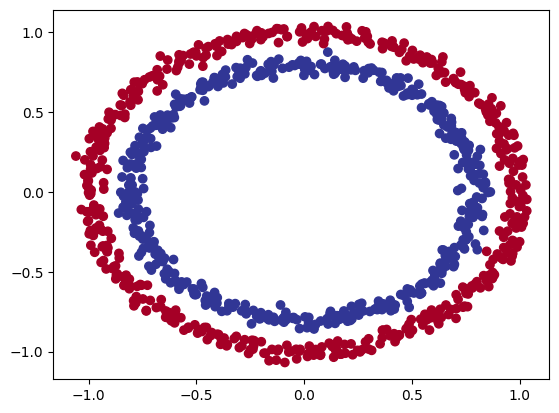

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)


In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Text(0.5, 0, 'epochs')

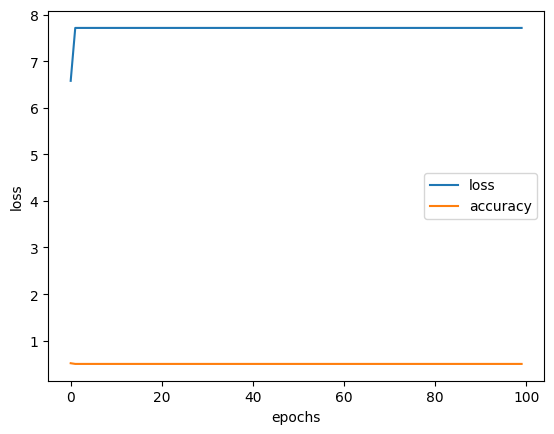

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> #### Improving the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
history_3 = model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data





Epoch 1/100
32/32 [==============================] - 4s 8ms/step - loss: 2.1779 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.7150 - accuracy: 0.5120
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6949 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6981 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7001 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6970 - accuracy: 0.5200
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6949 - accuracy: 0.4860
Epoch

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 1s 7ms/step - loss: 0.7005 - accuracy: 0.5090


[0.7004525065422058, 0.5090000033378601]

Text(0.5, 0, 'epochs')

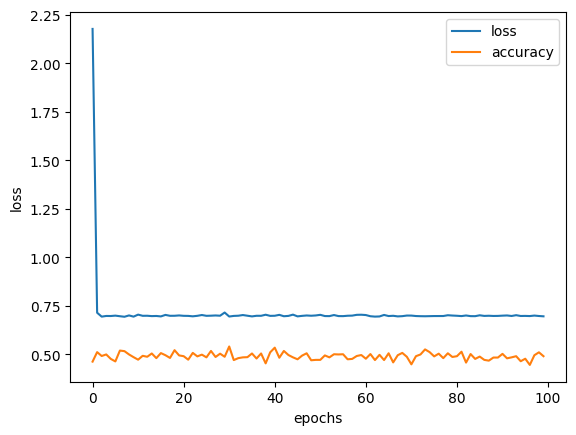

In [ ]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


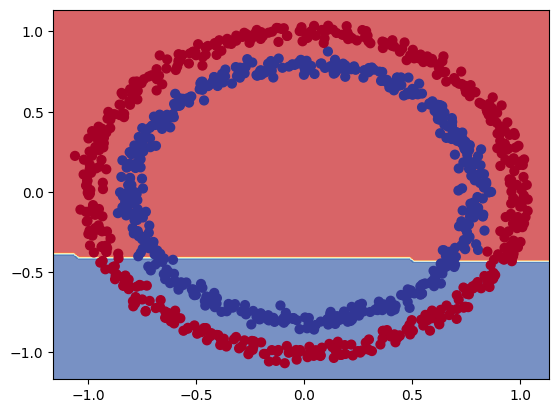

In [ ]:
plot_decision_boundary(model_2, X, y)

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


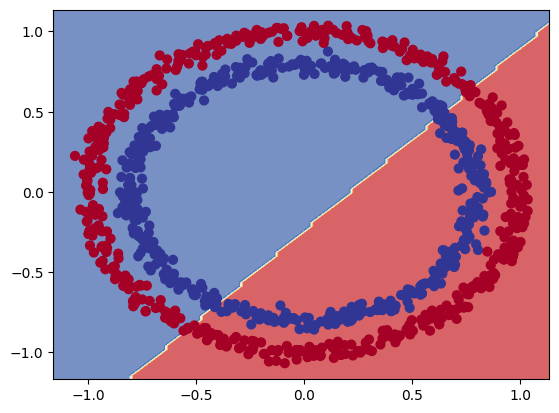

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # add an extra layer
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=("sigmoid"))]
)

model_4.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs=100)

test_loss, test_accuracy = model_4.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/100
25/25 [==============================] - 4s 8ms/step - loss: 0.7200 - accuracy: 0.4837
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6983 - accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5063
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6913 - accuracy: 0.5500
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6884 - accuracy: 0.6037
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6275
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.6313
Epoch 8/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6712 - accuracy: 0.6363
Epoch 9/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6651 - accuracy: 0.6637
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6512 - accuracy: 0.7150
Epoch 1

In [ ]:
pd.DataFrame(history_4.history)

loss  accuracy
0   0.720037   0.48375
1   0.698348   0.45500
2   0.692945   0.50625
3   0.691271   0.55000
4   0.688407   0.60375
..       ...       ...
95  0.021120   0.99625
96  0.021181   0.99500
97  0.021998   0.99625
98  0.019251   0.99750
99  0.020248   0.99625

[100 rows x 2 columns]

Text(0.5, 0, 'epochs')

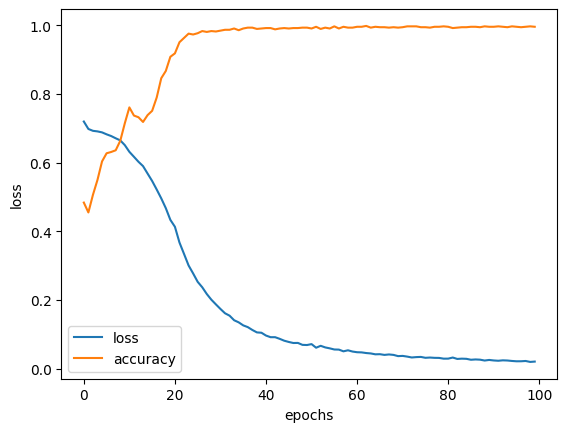

In [ ]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")



313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


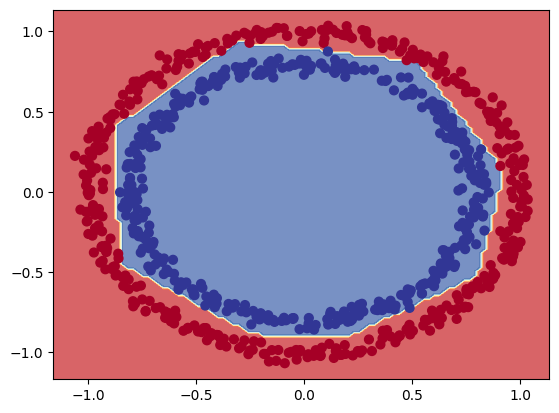

In [ ]:

plot_decision_boundary(model_4, X_train, y_train)

In [ ]:

model_4.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 4)                 12        
                                                                 
 dense_69 (Dense)            (None, 4)                 20        
                                                                 
 dense_70 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 2s 6ms/step
doing binary classifcation...
313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


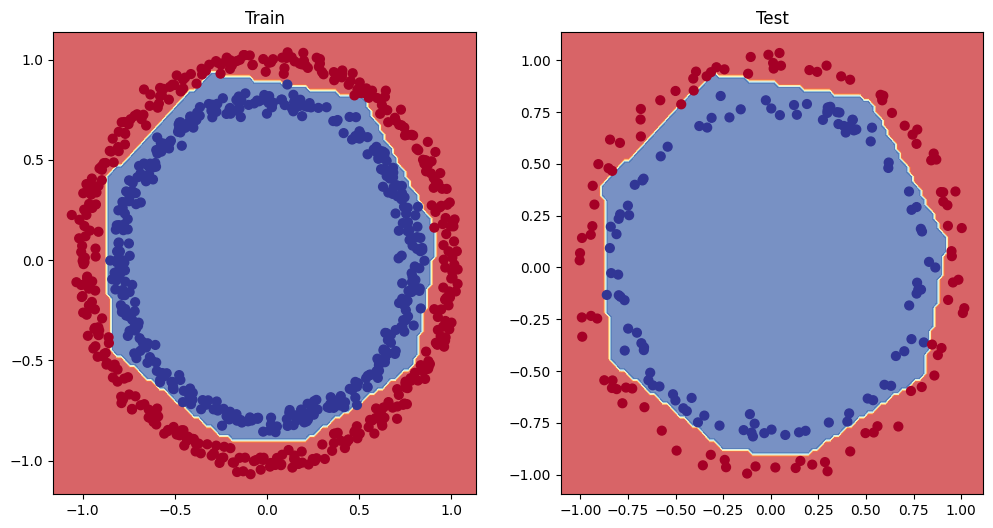

In [ ]:


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

> #### Finding the best learning rate


Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# create lr call back
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_schedular])


Epoch 1/100
25/25 [==============================] - 3s 12ms/step - loss: 0.6991 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 18ms/step - loss: 0.6985 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6980 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - los

<AxesSubplot:xlabel='epochs'>

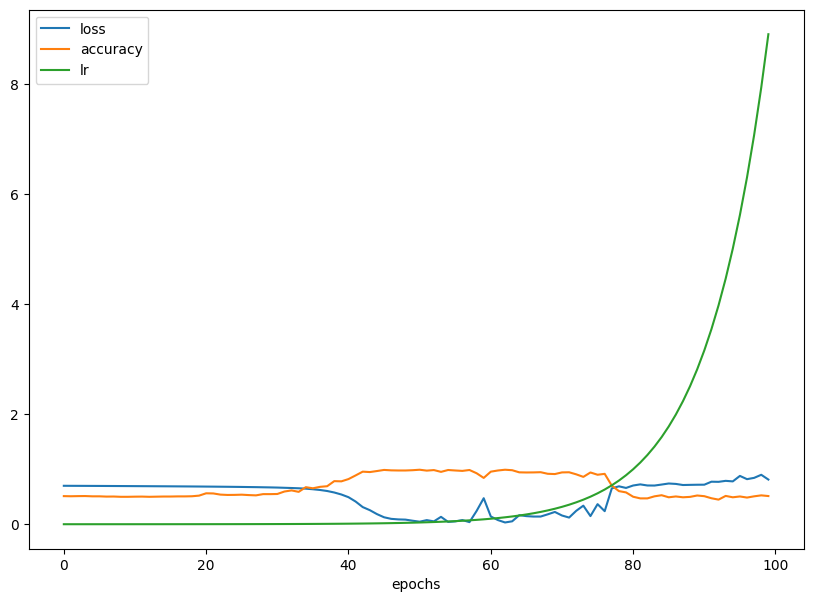

In [ ]:

pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")
# plt.ylabel("loss")


**How to know the value of the efficient lr**

Text(0, 0.5, 'loss')

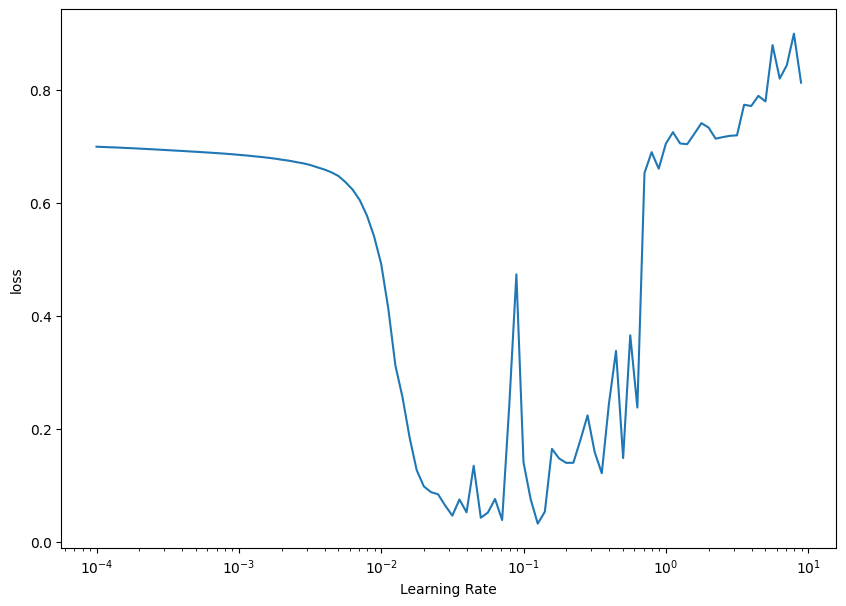

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # 100 no of epochs
# lambda epoch: 1e-4 * 10**(epoch/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")


To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [ ]:
# Set random seed
tf.random.set_seed(42)

best = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
best.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.025), # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# create lr call back
# lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

best_history = best.fit(X_train, y_train, epochs=50) #  callbacks=[lr_schedular]




Epoch 1/50
25/25 [==============================] - 4s 9ms/step - loss: 0.6977 - accuracy: 0.4938
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.5238
Epoch 3/50
25/25 [==============================] - 0s 12ms/step - loss: 0.6788 - accuracy: 0.6575
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6543 - accuracy: 0.6550
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 0.5832 - accuracy: 0.7200
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4731 - accuracy: 0.8037
Epoch 7/50
25/25 [==============================] - 0s 18ms/step - loss: 0.3935 - accuracy: 0.8462
Epoch 8/50
25/25 [==============================] - 0s 18ms/step - loss: 0.3238 - accuracy: 0.8750
Epoch 9/50
25/25 [==============================] - 0s 20ms/step - loss: 0.2490 - accuracy: 0.9112
Epoch 10/50
25/25 [==============================] - 0s 18ms/step - loss: 0.2463 - accuracy: 0.9038
Epoch 11/5

<AxesSubplot:>

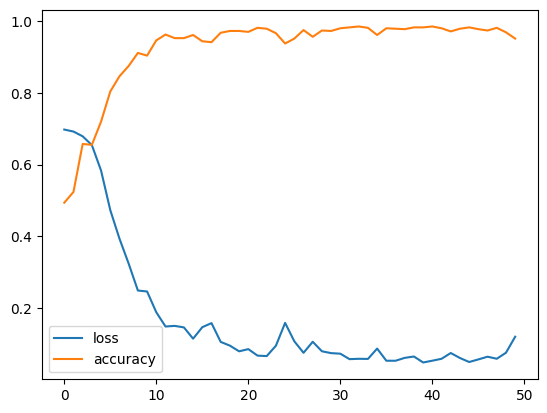

In [ ]:
pd.DataFrame(best_history.history).plot()
# plt.ylabel("loss")

In [ ]:
best.evaluate(X_test,y_test)

7/7 [==============================] - 1s 8ms/step - loss: 0.3290 - accuracy: 0.9000


[0.3290237486362457, 0.8999999761581421]

In [ ]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.9603 - accuracy: 0.5000


[0.9602727293968201, 0.5]

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...
313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


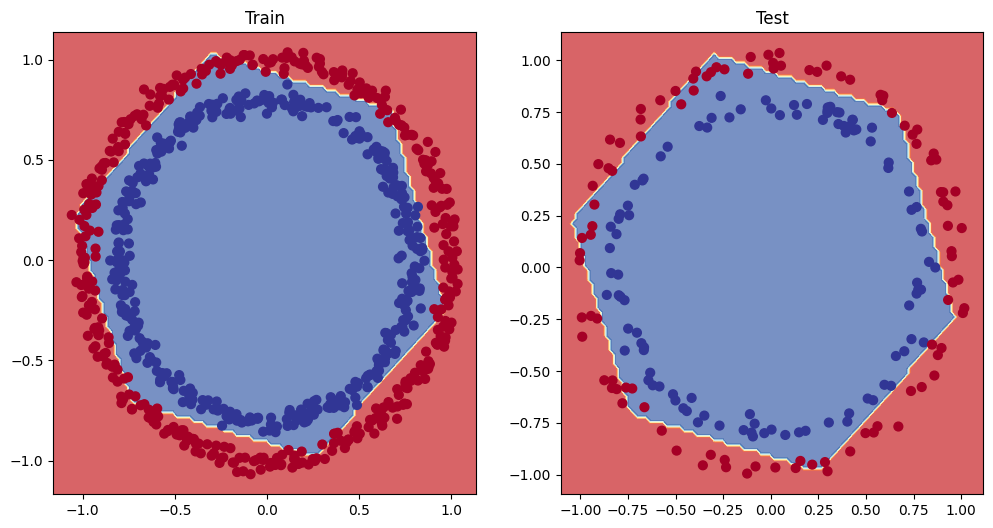

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(best, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(best, X=X_test, y=y_test)
plt.show;



| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

In [ ]:
loss, accuracy = best.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 8ms/step - loss: 0.3290 - accuracy: 0.9000
Model loss on test set: 0.3290237486362457
Model accuracy on test set: 90.00%


How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
y_preds = best.predict(X_test)

confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 5ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_preds.shape

(200, 1)

In [ ]:
y_test.shape

(200,)

In [ ]:
y_preds[:10], y_test[:10]

(array([[9.9999863e-01],
        [1.7055719e-01],
        [9.9999112e-01],
        [9.8068434e-01],
        [9.9056792e-01],
        [7.6052207e-01],
        [9.8096486e-04],
        [6.1611453e-04],
        [9.9985403e-01],
        [3.5208352e-02]], dtype=float32),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[ 80,  20],
       [  0, 100]])

<Figure size 800x600 with 0 Axes>

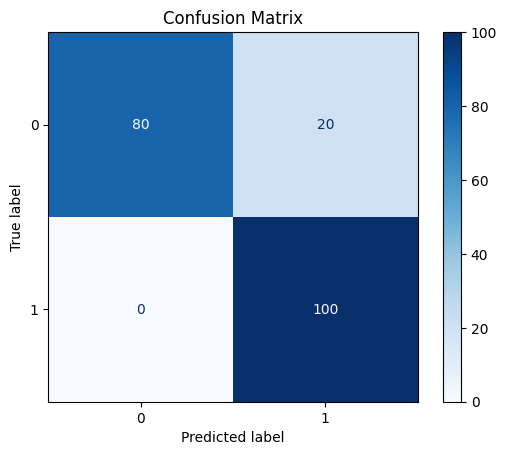

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, tf.round(y_preds))
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

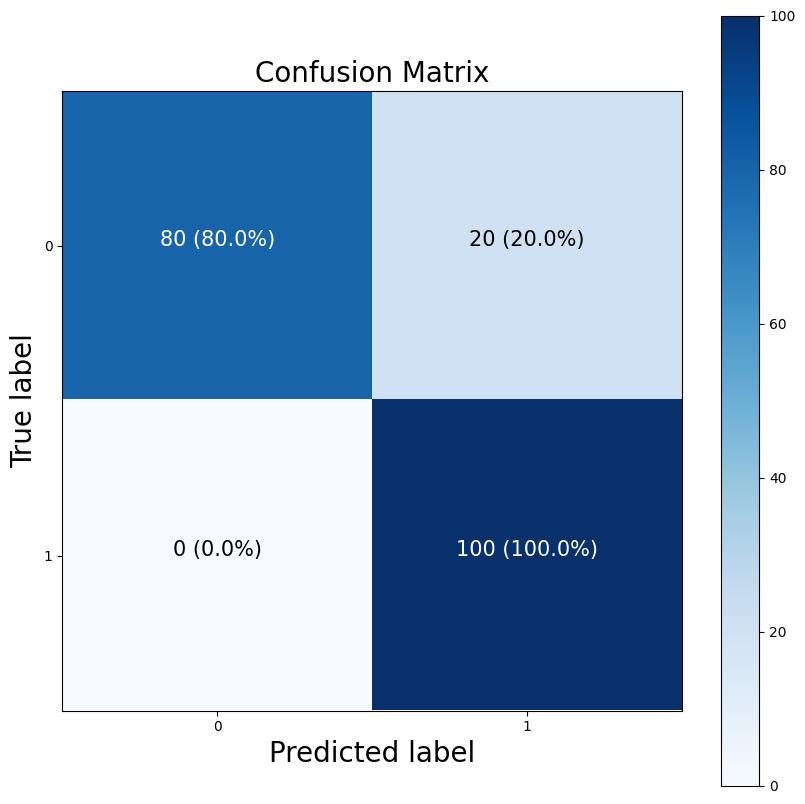

In [ ]:

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb



> ### Larger Example

In [ ]:
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

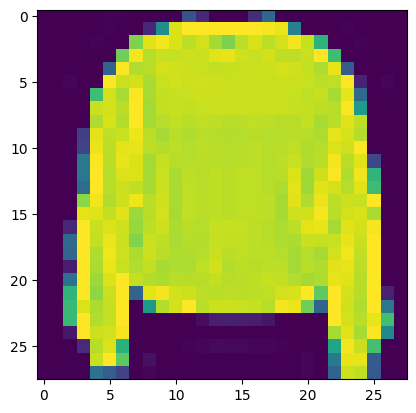

In [ ]:
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

2

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

> 🔑 **Note:** Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

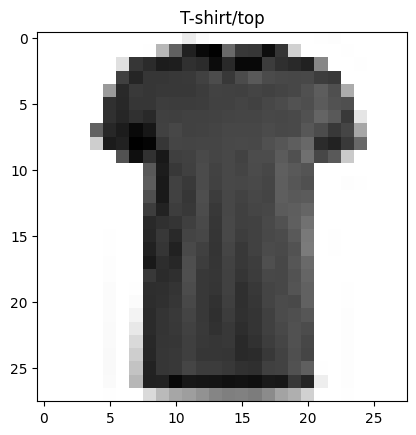

In [ ]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

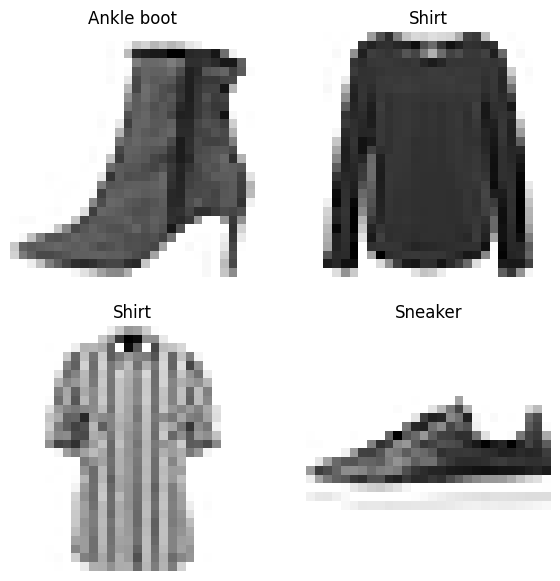

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax= plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [ ]:
tf.random.set_seed(42)

model_00 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_00.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_00_history = model_00.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 2.4726 - accuracy: 0.1182 - val_loss: 2.2287 - val_accuracy: 0.1337
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 2.2111 - accuracy: 0.1423 - val_loss: 2.1851 - val_accuracy: 0.1482
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.1585 - accuracy: 0.1612 - val_loss: 2.1411 - val_accuracy: 0.1626
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9582 - accuracy: 0.2025 - val_loss: 1.7818 - val_accuracy: 0.2124
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7468 - accuracy: 0.2364 - val_loss: 1.6959 - val_accuracy: 0.2790
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.6865 - accuracy: 0.2726 - val_loss: 1.6457 - val_accuracy: 0.3015
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.6429 - accuracy: 0.2907 - val_loss: 1.6963 - val_

In [ ]:
model_00.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the `model_00_history` variable when calling `fit()`). It's pixel values are between 0 and 255.


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

norm_01_ = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

norm_01_.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_01_history = model_00.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

"""
history.history = {
    'loss': [...],       # Training loss for each epoch
    'accuracy': [...],   # Training accuracy for each epoch (if defined)
    'val_loss': [...],   # Validation loss for each epoch (if validation data is provided)
    'val_accuracy': [...]# Validation accuracy for each epoch (if validation data is provided)
}

"""

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 1.3488 - accuracy: 0.4340 - val_loss: 1.0971 - val_accuracy: 0.5185
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9750 - accuracy: 0.6040 - val_loss: 0.9093 - val_accuracy: 0.6670
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8318 - accuracy: 0.7027 - val_loss: 0.7905 - val_accuracy: 0.7393
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7323 - accuracy: 0.7527 - val_loss: 0.7274 - val_accuracy: 0.7559
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6875 - accuracy: 0.7638 - val_loss: 0.6956 - val_accuracy: 0.7637
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6637 - accuracy: 0.7701 - val_loss: 0.6873 - val_accuracy: 0.7620
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6495 - accuracy: 0.7736 - val_loss: 0.6733 - val_a

In [ ]:
history_df_model_00_history = pd.DataFrame(model_00_history.history)
history_df_model_00_history.head(5)

loss  accuracy  val_loss  val_accuracy
0  2.472609  0.118150  2.228688        0.1337
1  2.211133  0.142300  2.185117        0.1482
2  2.158460  0.161250  2.141112        0.1626
3  1.958213  0.202533  1.781783        0.2124
4  1.746814  0.236367  1.695914        0.2790

In [ ]:
history_df = pd.DataFrame(norm_01_history.history)
history_df.head(5)

loss  accuracy  val_loss  val_accuracy
0  1.348785  0.434033  1.097083        0.5185
1  0.975011  0.603950  0.909334        0.6670
2  0.831830  0.702683  0.790457        0.7393
3  0.732271  0.752650  0.727432        0.7559
4  0.687496  0.763767  0.695620        0.7637

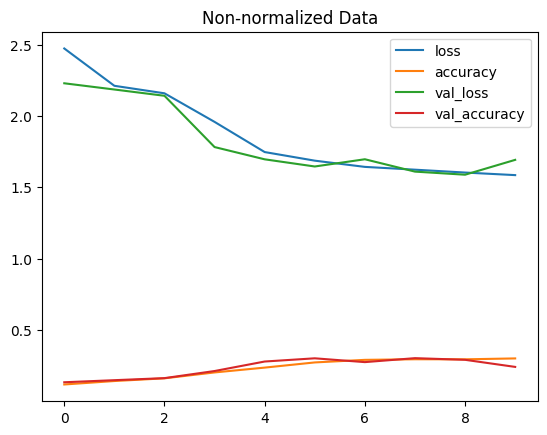

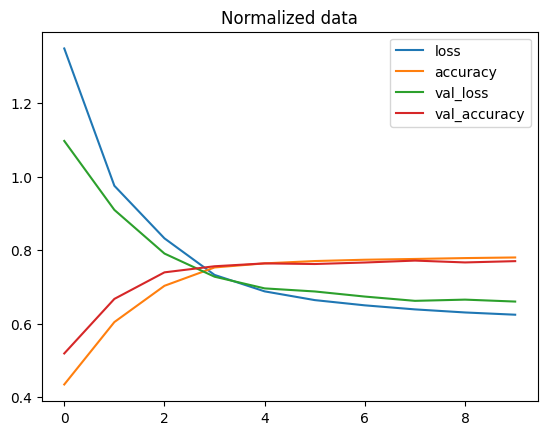

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(model_00_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_01_history.history).plot(title="Normalized data");

In [ ]:
tf.random.set_seed(42)

model_02=  tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

model_02.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


find_lr_history = model_02.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 19s 9ms/step - loss: 1.9181 - accuracy: 0.2224 - val_loss: 1.7332 - val_accuracy: 0.3077 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 18s 10ms/step - loss: 1.6184 - accuracy: 0.3142 - val_loss: 1.5497 - val_accuracy: 0.3327 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 15s 8ms/step - loss: 1.4962 - accuracy: 0.3449 - val_loss: 1.4855 - val_accuracy: 0.3613 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 15s 8ms/step - loss: 1.3924 - accuracy: 0.4249 - val_loss: 1.3581 - val_accuracy: 0.4273 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 16s 9ms/step - loss: 1.3219 - accuracy: 0.4402 - val_loss: 1.3181 - val_accuracy: 0.4697 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 17s 9ms/step - loss: 1.2748 - accuracy: 0.4566 - val_loss: 1.2111 - val_accuracy: 0.5332 - lr: 0.0018
Epoch 7/40
1875/1875 [=============================

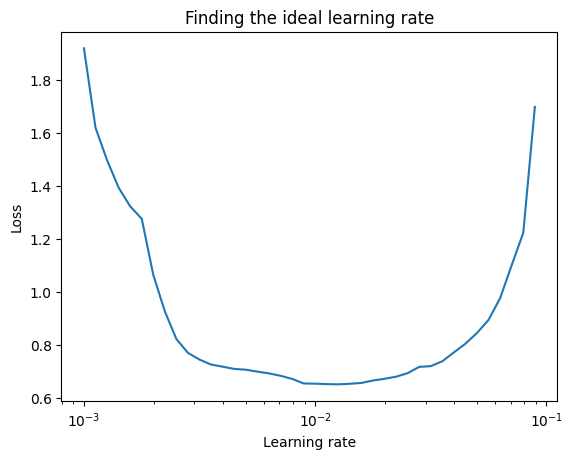

In [ ]:

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_04 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_04.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_04.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 1.1273 - accuracy: 0.5324 - val_loss: 0.9037 - val_accuracy: 0.6425
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9019 - accuracy: 0.6247 - val_loss: 0.9093 - val_accuracy: 0.6597
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8679 - accuracy: 0.6390 - val_loss: 0.8705 - val_accuracy: 0.6374
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8543 - accuracy: 0.6478 - val_loss: 0.9173 - val_accuracy: 0.6341
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8399 - accuracy: 0.6607 - val_loss: 0.8266 - val_accuracy: 0.6651
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8202 - accuracy: 0.6844 - val_loss: 0.8208 - val_accuracy: 0.7146
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.8077 - accuracy: 0.7060 - val_loss: 0.8071 - val_ac

In [ ]:
# # Note: The following confusion matrix code is a remix of Scikit-Learn's
# # plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# # and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# import itertools
# from sklearn.metrics import confusion_matrix


# def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
#     cm = confusion_matrix(y_true, y_pred)
#     cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # if cm 2*2 --> op  2*1
#     n_classes = cm.shape[0]

#     fig, ax = plt.subplots(figsize= figsize)
#     cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
#     fig.colorbar(cax)

#     if classes:
#         labels = classes
#     else:
#         labels = np.arange(cm.shape[0])

#     ax.set(title= "Confusion Matrix",
#             xlabel= "Predicted label",
#             ylabel= "True label",
#             xtricks= np.arange(n_classes),# create enough axis slots for each class
#             ytricks=np.arange(n_classes),
#             xticklabels=labels, # axes will labeled with class names (if they exist) or ints
#             yticklabels=labels)
#     # Make x-axis labels appear on bottom
#     ax.xaxis.set_label_position("bottom")
#     ax.xaxis.tick_bottom()

#     # set threshold for different colors
#     threshold = (cm.max() + cm.min) / 2.
#     # plot text on each cell
#     for i , j in itertools.product(range(cm.shape[0], range(cm.shape[1]))):
#         plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > threshold else "black",
#                  size=text_size)


In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_probs_04 = model_04.predict(test_data) # "probs" is short for probabilities

y_probs_04[:5]

147/313 [=============>................] - ETA: 1s

313/313 [==============================] - 3s 8ms/step


array([[1.08673512e-15, 3.89765519e-18, 3.86027880e-14, 3.65513869e-10,
        4.53716682e-11, 1.00816444e-01, 1.26107924e-12, 1.49408132e-01,
        5.03438923e-06, 7.49770343e-01],
       [3.99417739e-04, 3.95686121e-16, 7.34723985e-01, 7.98417865e-09,
        2.27860540e-01, 4.42943617e-28, 3.70144024e-02, 1.14633484e-26,
        1.68577390e-06, 0.00000000e+00],
       [9.95085202e-03, 9.52217937e-01, 1.44558853e-05, 3.76694426e-02,
        2.12266491e-06, 2.85308142e-05, 1.16603311e-04, 3.55547747e-09,
        2.39494362e-08, 2.69113509e-09],
       [9.95085202e-03, 9.52217937e-01, 1.44558853e-05, 3.76694426e-02,
        2.12266491e-06, 2.85308142e-05, 1.16603311e-04, 3.55547747e-09,
        2.39494362e-08, 2.69113509e-09],
       [2.29938596e-01, 1.56802213e-04, 1.57316625e-01, 1.40498713e-01,
        1.39182895e-01, 9.66179101e-08, 3.30308050e-01, 2.84075519e-09,
        2.59830803e-03, 4.37922937e-15]], dtype=float32)

In [ ]:
y_probs_04[0].argmax(),  class_names[y_probs_04[0].argmax()]

(9, 'Ankle boot')

In [ ]:
y_preds_04 = y_probs_04.argmax(axis=1)
y_preds_04[:5]

array([9, 2, 1, 1, 6])

In [ ]:
len(y_preds_04)

10000

In [ ]:
y_preds_04.shape

(10000,)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds_04)

array([[794,   2,  28, 125,  25,   1,  11,   0,  14,   0],
       [ 22, 918,   1,  51,   3,   0,   4,   0,   1,   0],
       [ 61,   0, 514,  21, 299,   1,  96,   0,   8,   0],
       [ 71,  10,   5, 809,  36,  12,  42,   0,  15,   0],
       [  6,   0,  88,  47, 791,   0,  53,   0,  15,   0],
       [  0,   0,   0,  12,   0, 750,   0,  80,  17, 141],
       [234,   0, 118, 104, 398,   1, 126,   0,  19,   0],
       [  0,   0,   0,   0,   0,  57,   0, 802,   1, 140],
       [  1,   0,   4,  17,  63,   6,   7,   6, 894,   2],
       [  0,   0,   0,   0,   1,  29,   0,  15,   0, 955]])

In [ ]:
comparison_series = pd.Series(test_labels == y_preds_04)

# Use value_counts to get counts of True and False
value_counts = comparison_series.value_counts()
print(value_counts)

True     7353
False    2647
dtype: int64


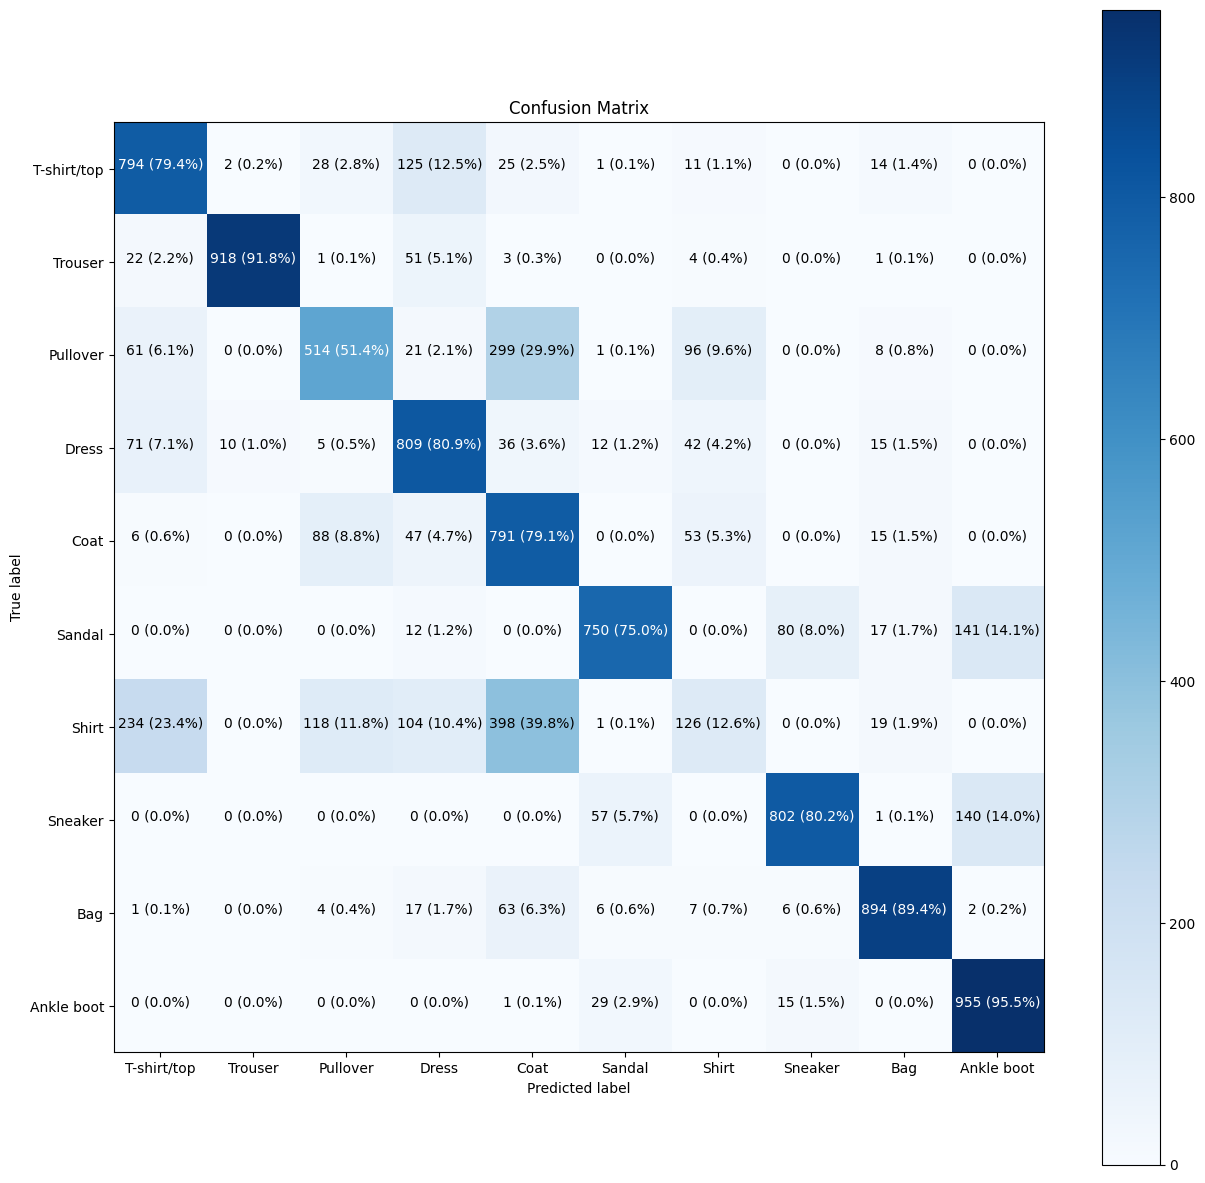

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds_04,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 83ms/step


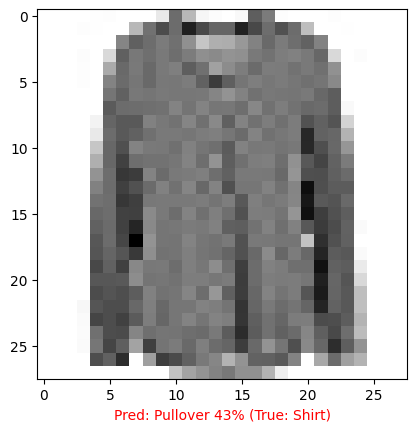

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_04,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
model_04.layers

In [ ]:
model_04.layers[1]

And we can find the patterns learned by a particular layer using the `get_weights()` method.

The `get_weights()` method returns the **weights** (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [ ]:
weights, biases = model_04.layers[1].get_weights()
weights, weights.shape

(array([[-0.06181395, -0.0304077 ,  0.03701497, -2.127626  ],
        [-2.4819763 ,  0.06419781, -0.04286218, -6.534536  ],
        [-6.2464633 ,  0.01576737,  0.01540203,  3.71356   ],
        ...,
        [-1.3024095 ,  0.0359711 , -0.00831193, -4.8017054 ],
        [-1.6510534 , -0.00976761,  0.05287655, -6.07142   ],
        [-1.6998097 , -0.03492901, -0.02917999, -1.8662615 ]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)) and are then updated to better representative values of the data (non-random) by the neural network during training.

![neural network supervised learning weight updates](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)
*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Now let's check out the bias vector.

In [ ]:
biases, biases.shape

(array([14.301911  , -0.06005332, -0.06005168, 11.728212  ], dtype=float32),
 (4,))

In [ ]:
model_04.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_110 (Dense)           (None, 4)                 3140      
                                                                 
 dense_111 (Dense)           (None, 4)                 20        
                                                                 
 dense_112 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


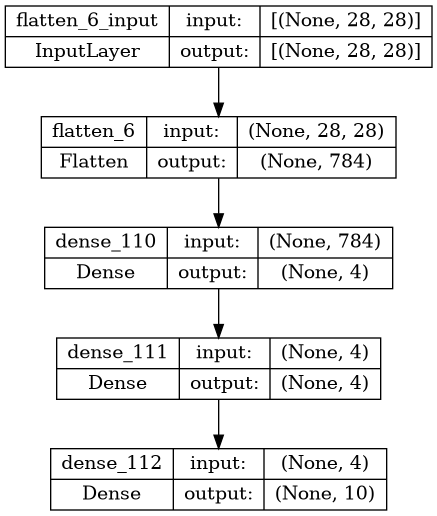

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_04, show_shapes=True)

# **Ch-04: CNN and Computer Vision with NN on Tensor Flow**

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-11-10 12:42:38.052500


In [4]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-11-10 12:45:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.207, 108.177.125.207, 142.250.157.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.4MB/s    in 4.3s    

2024-11-10 12:45:33 (24.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [6]:
!ls pizza_steak

test  train


In [7]:
!ls pizza_steak/train/

pizza  steak


In [8]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [9]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'


In [10]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [16]:
# get the class names programmatically
import pathlib
import numpy as np
data_dir  = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [19]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (304, 512, 3)


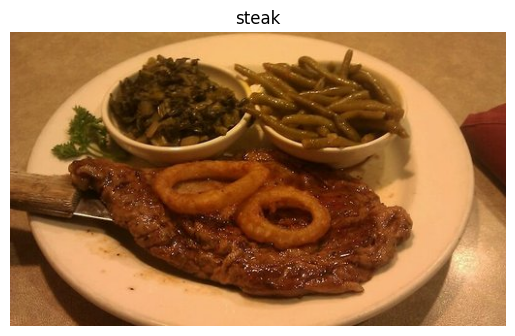

In [20]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[242, 220, 196],
        [240, 218, 194],
        [241, 219, 195],
        ...,
        [162, 124, 111],
        [152, 115, 106],
        [143, 106,  97]],

       [[242, 220, 196],
        [241, 219, 195],
        [242, 220, 196],
        ...,
        [157, 119, 106],
        [150, 112, 101],
        [142, 106,  94]],

       [[244, 222, 198],
        [242, 220, 196],
        [242, 220, 196],
        ...,
        [156, 117, 102],
        [148, 109,  94],
        [139, 101,  88]],

       ...,

       [[251, 227, 203],
        [248, 224, 200],
        [247, 223, 197],
        ...,
        [108,  16,  27],
        [111,  20,  29],
        [114,  25,  31]],

       [[251, 229, 205],
        [250, 226, 202],
        [248, 224, 198],
        ...,
        [107,  14,  25],
        [108,  15,  25],
        [110,  19,  28]],

       [[250, 228, 204],
        [246, 224, 200],
        [247, 221, 196],
        ...,
        [106,  13,  24],
        [102,   9,  19],
        [102,   9,  19]]], dtype=uint8)
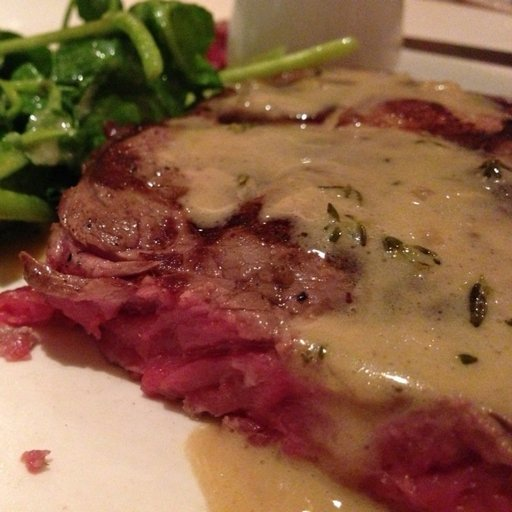

In [16]:
img

In [17]:
img.shape

(512, 512, 3)

In [18]:
img/255.


array([[[0.94901961, 0.8627451 , 0.76862745],
        [0.94117647, 0.85490196, 0.76078431],
        [0.94509804, 0.85882353, 0.76470588],
        ...,
        [0.63529412, 0.48627451, 0.43529412],
        [0.59607843, 0.45098039, 0.41568627],
        [0.56078431, 0.41568627, 0.38039216]],

       [[0.94901961, 0.8627451 , 0.76862745],
        [0.94509804, 0.85882353, 0.76470588],
        [0.94901961, 0.8627451 , 0.76862745],
        ...,
        [0.61568627, 0.46666667, 0.41568627],
        [0.58823529, 0.43921569, 0.39607843],
        [0.55686275, 0.41568627, 0.36862745]],

       [[0.95686275, 0.87058824, 0.77647059],
        [0.94901961, 0.8627451 , 0.76862745],
        [0.94901961, 0.8627451 , 0.76862745],
        ...,
        [0.61176471, 0.45882353, 0.4       ],
        [0.58039216, 0.42745098, 0.36862745],
        [0.54509804, 0.39607843, 0.34509804]],

       ...,

       [[0.98431373, 0.89019608, 0.79607843],
        [0.97254902, 0.87843137, 0.78431373],
        [0.96862745, 0


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

| Feature                         | Convolutional Layer                               | Fully Connected Layer (Dense Layer)            |
|---------------------------------|---------------------------------------------------|------------------------------------------------|
| **Purpose**                     | Extracts features from input data by detecting patterns | Connects all neurons to extract global features or make final predictions |
| **Connection Type**             | Local connections (each neuron connects only to a small region of the input) | Fully connected (each neuron connects to all neurons in the previous layer) |
| **Weight Sharing**              | Weights are shared across different regions, reducing parameter count | No weight sharing; each connection has a unique weight |
| **Parameter Count**             | Fewer parameters due to local connections and weight sharing | Many parameters, especially in large networks, due to full connectivity |
| **Spatial Structure**           | Preserves spatial structure, ideal for image data  | Ignores spatial structure, treating input as a flat vector |
| **Computational Cost**          | Lower, since only a subset of connections are calculated | Higher, as all connections are calculated |
| **Data Type Suitability**       | Best for grid-like data (images, audio)            | Suitable for flattened, non-spatial data       |
| **Common Use**                  | Early and intermediate layers in CNNs for feature extraction | Final layers in CNNs or used in MLPs for classification or regression |


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

# preprocess data "scalling/ normalization"
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir  = "pizza_steak/test/"

# import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True
                                               )
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(
    train_data,
    epochs=5,
    validation_data=valid_data
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6892 - loss: 0.5942 - val_accuracy: 0.7920 - val_loss: 0.4506
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.7789 - loss: 0.4945 - val_accuracy: 0.8120 - val_loss: 0.4212
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8230 - loss: 0.4238 - val_accuracy: 0.8400 - val_loss: 0.3624
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8465 - loss: 0.3890 - val_accuracy: 0.8520 - val_loss: 0.3559
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8533 - loss: 0.3571 - val_accuracy: 0.8660 - val_loss: 0.3205


This code demonstrates a basic workflow for training a convolutional neural network (CNN) using TensorFlow and Keras. Here’s an explanation of each section:

### 1. Imports and Setup

- **TensorFlow and Keras Imports**: TensorFlow is imported as `tf`, and Keras’s `ImageDataGenerator` class is imported to handle image preprocessing and data augmentation.
- **Random Seed**: Setting a random seed (42) ensures reproducible results, so the data split and model training will yield the same results each time.

### 2. Data Preprocessing

- **Rescaling**: Each pixel value is divided by 255 to scale it to a range between 0 and 1, which improves training stability. This normalization is applied to both training and validation data.

### 3. Data Loading and Batching

- **Directory Structure**: Images are organized in folders for each class (e.g., pizza and steak). `flow_from_directory` imports and batches the images from these directories.
- **Parameters**:
  - `batch_size=32`: Loads 32 images at a time.
  - `target_size=(224,224)`: Resizes all images to 224x224 pixels.
  - `class_mode="binary"`: Indicates binary classification (i.e., pizza vs. steak).

### 4. CNN Model Definition

- **Convolution Layers**: [Explanation on Youtube for Conv2D](https://www.youtube.com/watch?v=1GXgllswEeo)
  - **Conv2D Layers**: Each convolution layer applies filters (kernels) that extract features from images. Each layer uses 10 filters of size 3x3, with ReLU activation to add non-linearity.
  - **MaxPooling Layers**: Reduces spatial dimensions by taking the maximum value in each 2x2 region, retaining essential features while reducing computation.
  - **Flatten Layer**: Converts the 2D output into a 1D vector for the fully connected layer.
  - **Dense Layer**: A single node with a sigmoid activation function provides the final binary classification output.

### 5. Model Compilation

- **Loss Function**: `binary_crossentropy` is used for binary classification tasks.
- **Optimizer**: The Adam optimizer adjusts learning rates during training for efficient convergence.
- **Metrics**: `accuracy` is tracked to measure model performance.

### 6. Model Training

- **Training Parameters**:
  - **Epochs**: The model trains for 5 epochs (full passes through the training data).
  - **Steps per Epoch**: Specifies the number of training steps per epoch, calculated by the size of the training dataset.
  - **Validation Data**: `valid_data` is used to evaluate performance after each epoch.


In [23]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)


Now there are a few new things here we haven't discussed, namely:
* The [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class and the `rescale` parameter
* The [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method
  * The `batch_size` parameter
  * The `target_size` parameter
* [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers (and the parameters which come with them)
* [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.


In [25]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])



history_2 = model_2.fit(
    train_data,
    epochs=5,
    validation_data=valid_data
)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 190ms/step - accuracy: 0.4849 - loss: 1.2308 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.4863 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.4962 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.4905 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.

In [27]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

### Summary of Model Comparison and Improvement Suggestions

The difference between `model_1` and `model_2` lies in the type and complexity of the layers used. Although `model_2` has significantly more parameters (602,141 vs. 31,101 in `model_1`), it doesn't perform as well. This highlights an important insight: **more parameters don’t always lead to better performance**.

#### Key Points

- **Trainable Parameters**: These represent the patterns a model can learn from data. While more parameters increase the potential for learning, they don’t guarantee better results.
- **Dense Layers (in `model_2`)**: These are fully connected layers, resulting in a high parameter count due to every neuron being connected to each other in adjacent layers.
- **Convolutional Layers (in `model_1`)**: Convolutional layers focus on extracting essential features from images, making them efficient for image data as they capture key patterns while ignoring irrelevant details.

In this case, `model_1` (the convolutional model) performs better, showing that **quality of parameters is more valuable than quantity** when it comes to image data.

#### Suggestions for Improving Performance

1. **Increase the Number of Layers**: Adding more convolutional and pooling layers can improve the model's ability to recognize complex patterns.
2. **Increase the Number of Neurons (or Filters) per Layer**: For convolutional layers, increase the number of filters. For dense layers, add more neurons.
3. **Experiment with Regularization**: Using techniques like dropout can help prevent overfitting, which is particularly helpful as model complexity increases.

Increasing complexity can help the model learn better, but be mindful of **overfitting** as well.
This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## **Binary Classification Mini-Project using Conv2D**

Image shape: (512, 384, 3)
Image shape: (384, 512, 3)


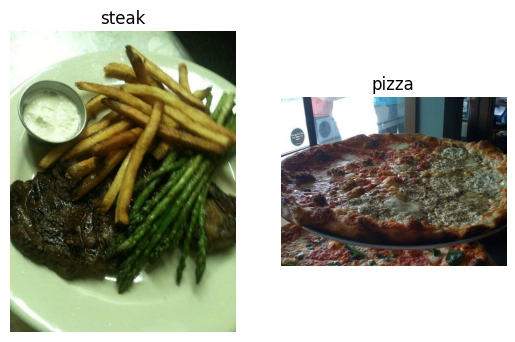

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/", "pizza")



In [22]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


In [23]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
images, labels = next(train_data)  # get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [9]:
images[:2], images[0].shape

(array([[[[0.07843138, 0.05882353, 0.07450981],
          [0.05882353, 0.03921569, 0.05490196],
          [0.05882353, 0.0509804 , 0.0627451 ],
          ...,
          [0.37254903, 0.3647059 , 0.36862746],
          [0.36862746, 0.36078432, 0.3647059 ],
          [0.37254903, 0.3647059 , 0.36862746]],
 
         [[0.05882353, 0.03921569, 0.05490196],
          [0.04705883, 0.02745098, 0.04313726],
          [0.04313726, 0.03529412, 0.04705883],
          ...,
          [0.3803922 , 0.37254903, 0.37647063],
          [0.3921569 , 0.38431376, 0.38823533],
          [0.40000004, 0.3921569 , 0.39607847]],
 
         [[0.05490196, 0.03529412, 0.0509804 ],
          [0.04705883, 0.02745098, 0.04313726],
          [0.03529412, 0.02745098, 0.03921569],
          ...,
          [0.38431376, 0.37647063, 0.3803922 ],
          [0.39607847, 0.38823533, 0.3921569 ],
          [0.4039216 , 0.39607847, 0.40000004]],
 
         ...,
 
         [[0.07058824, 0.06666667, 0.09019608],
          [0.06666

In [10]:
labels

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either `0` (pizza) or `1` (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [13]:
# # Convert flow_from_directory generators to tf.data.Dataset
# train_data = tf.data.Dataset.from_generator(
#     lambda: train_data,
#     output_signature=(
#         tf.TensorSpec(shape=(32, 224, 224, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(32,), dtype=tf.int32)
#     )
# ).repeat()  # Now repeat the dataset after each epoch

# test_data = tf.data.Dataset.from_generator(
#     lambda: test_data,
#     output_signature=(
#         tf.TensorSpec(shape=(32, 224, 224, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(32,), dtype=tf.int32)
#     )
# ).repeat()  # Repeat test dataset as well

In [26]:
model_4 = Sequential([
    InputLayer(input_shape=(224, 224, 3)),  # Specify input shape here
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.


In [27]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# import os

# # Counting the number of images in the training and test directories
# train_samples = sum([len(files) for r, d, files in os.walk(train_dir)])  # Count images in train directory
# test_samples = sum([len(files) for r, d, files in os.walk(test_dir)])    # Count images in test directory

# batch_size = 32

# # Calculate steps per epoch
# steps_per_epoch_train = train_samples // batch_size
# steps_per_epoch_test = test_samples // batch_size

# steps_per_epoch_train, steps_per_epoch_test


In [28]:

history_4 = model_4.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.5890 - loss: 1.0128 - val_accuracy: 0.7820 - val_loss: 0.4614
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.7748 - loss: 0.4673 - val_accuracy: 0.8260 - val_loss: 0.4083
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.8393 - loss: 0.3650 - val_accuracy: 0.7980 - val_loss: 0.4421
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9422 - loss: 0.2092 - val_accuracy: 0.7420 - val_loss: 0.6294
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9703 - loss: 0.0922 - val_accuracy: 0.7580 - val_loss: 0.6380


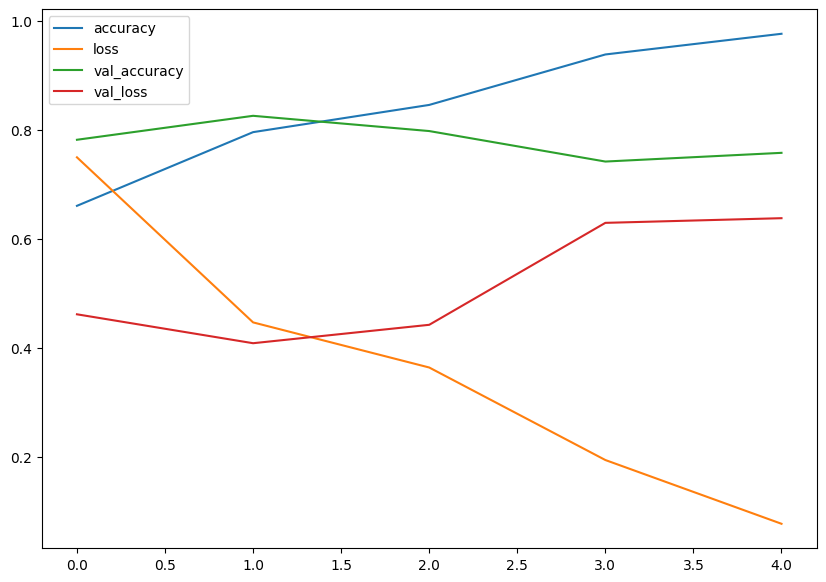

In [29]:
# evaluation
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Hmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [37]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuray = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('Epochs')
  plt.legend()

  # plt acc
  plt.figure()
  plt.plot(epochs, accuray, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


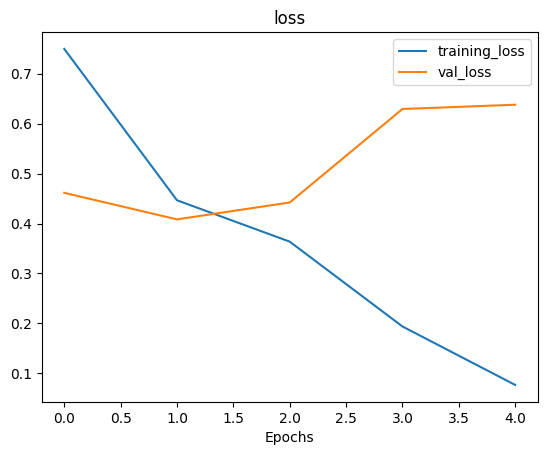

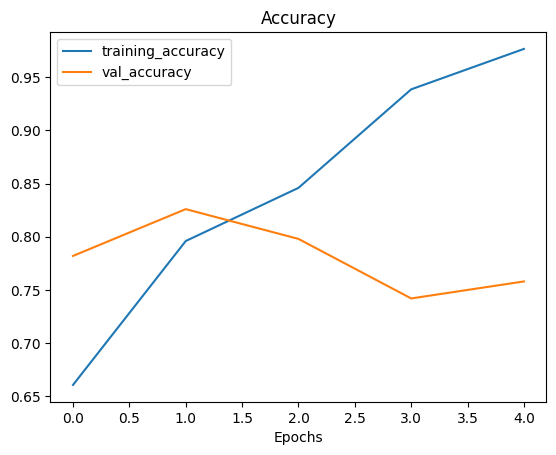

In [38]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [39]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

#### **Adjusting the model parameters**


Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [40]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), # reduce number if features by half
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the *most important* of those features.

In [41]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [42]:


history_5 = model_5.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5956 - loss: 0.6676 - val_accuracy: 0.8140 - val_loss: 0.4550
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7906 - loss: 0.4782 - val_accuracy: 0.8540 - val_loss: 0.3731
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8194 - loss: 0.4107 - val_accuracy: 0.8660 - val_loss: 0.3254
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8490 - loss: 0.3760 - val_accuracy: 0.8780 - val_loss: 0.3115
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8568 - loss: 0.3565 - val_accuracy: 0.8880 - val_loss: 0.2870


Okay, it looks like our model with max pooling (`model_5`) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture.

In [43]:
model_5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

Time to check out the loss curves.

**The trade off bertween training and testing**

![trade-off ](https://www.soapboxlabs.com/wp-content/uploads/2022/07/Soapbox-blog-learning-curves-overerfit-model-1.png)

[Exaplanation under and over-fitting](https://www.soapboxlabs.com/blog/common-machine-learning-problems/)

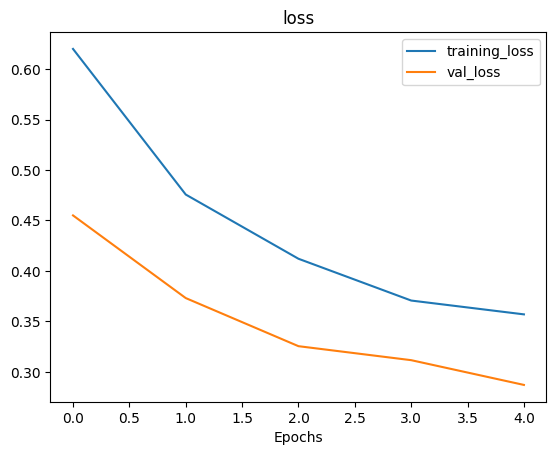

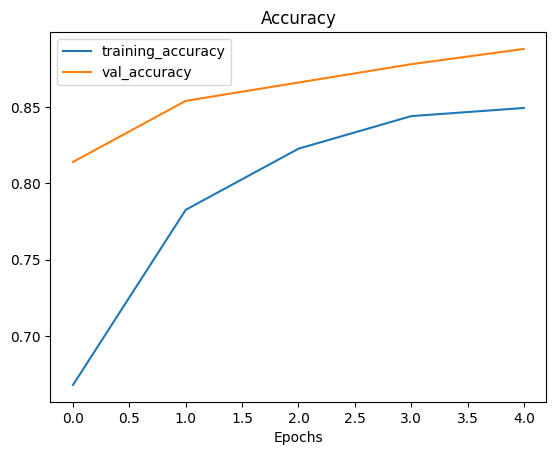

In [44]:
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

In [45]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [47]:
print("aug train img")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

aug train img
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [49]:
images, labels =next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

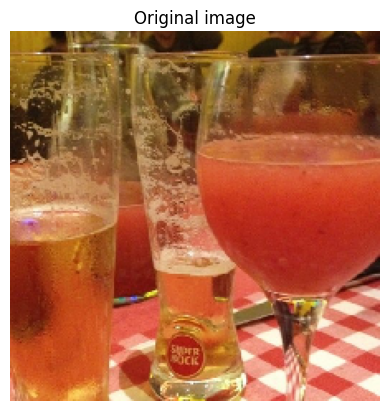

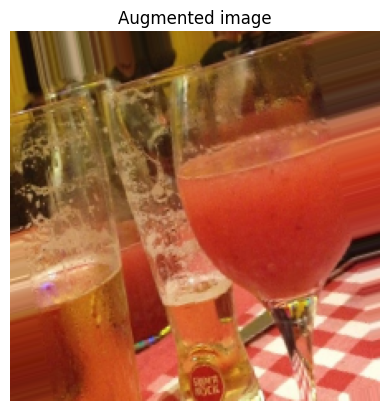

In [50]:
random_number = random.randint(0 ,31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


> 🤔 **Question:** Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as `model_5`.

In [51]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        validation_data=test_data,
                       )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5444 - loss: 0.7458 - val_accuracy: 0.5120 - val_loss: 0.6876
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5834 - loss: 0.6879 - val_accuracy: 0.6580 - val_loss: 0.6806
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5587 - loss: 0.6952 - val_accuracy: 0.7460 - val_loss: 0.6797
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6044 - loss: 0.6913 - val_accuracy: 0.6740 - val_loss: 0.6631
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5921 - loss: 0.6774 - val_accuracy: 0.7140 - val_loss: 0.6047


### Brief Explanation:

The model's poor initial performance on the training set was due to turning off data shuffling (`shuffle=False`) in the `train_data_augmented`. This caused the model to process one class of images at a time, which hindered its ability to learn from both classes simultaneously. Setting `shuffle=True` will resolve this issue, allowing the model to see a mix of images during training.

Additionally, training with augmented data takes longer (~25s per epoch) compared to non-augmented data (~10s per epoch). This is because the `ImageDataGenerator` augments the data as it's loaded into the model, which is time-consuming but preserves the original images. To speed up dataset handling, TensorFlow's parallel reading and buffered prefetching options can be explored.


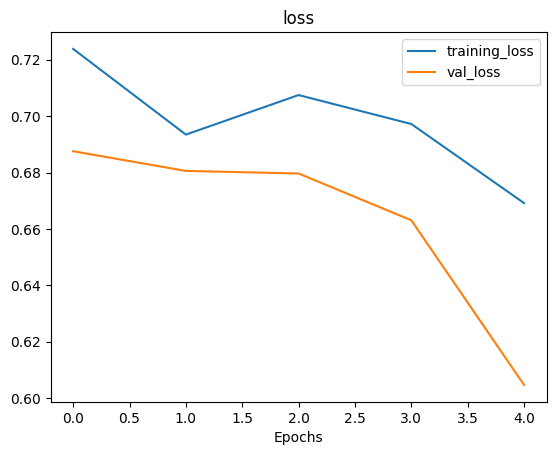

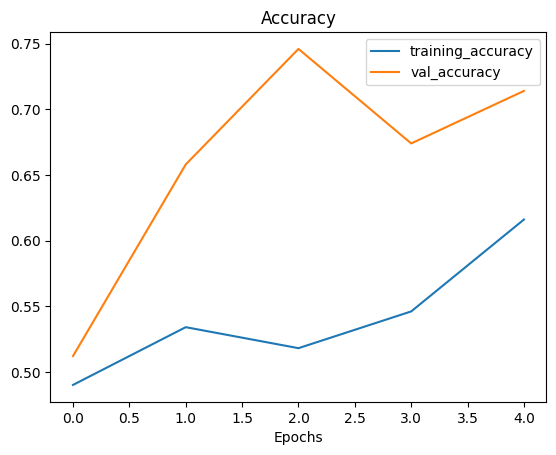

In [52]:
plot_loss_curves(history_6)

The validation loss is going down, but it's a bit unstable. Ideally, the curve should go down smoothly, but that's not always realistic. Let's try shuffling the training data to see if it helps.







In [53]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [54]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        validation_data=test_data,
                        )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5634 - loss: 0.6918 - val_accuracy: 0.7220 - val_loss: 0.5647
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.7378 - loss: 0.5727 - val_accuracy: 0.8160 - val_loss: 0.4112
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7053 - loss: 0.5767 - val_accuracy: 0.8280 - val_loss: 0.4291
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7648 - loss: 0.5084 - val_accuracy: 0.7820 - val_loss: 0.4572
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.7492 - loss: 0.5165 - val_accuracy: 0.7760 - val_loss: 0.4825


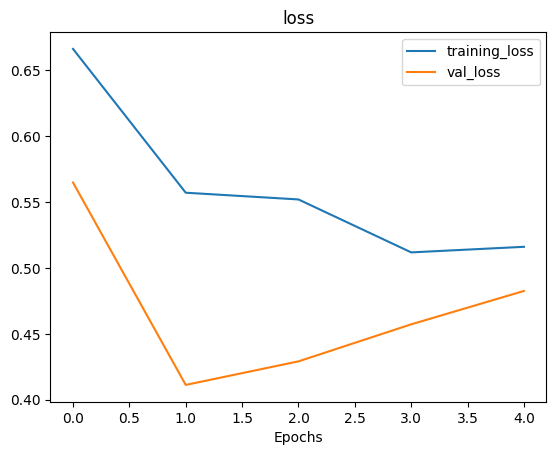

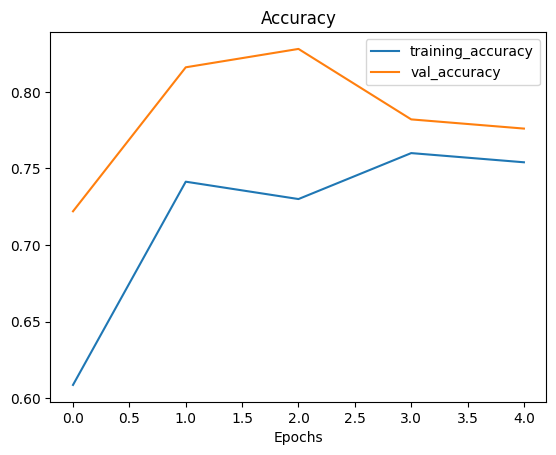

In [55]:
plot_loss_curves(history_7)

Notice that `model_7` performs better on the training data compared to `model_6`. This is because we shuffled the training data using `shuffle=True`, so the model saw both pizza and steak images in each batch.

As a result, the loss curves are smoother in `model_7` compared to `model_6`.

#### Repeat Until Satisfied

We’ve trained a few models, and they’re performing well. To keep improving our model, we can try a few things:

* Add more layers (e.g., more convolutional layers).
* Increase the number of filters in each layer (e.g., from 10 to 32, 64, or 128).
* Train for more epochs.
* Find the best learning rate.
* Add more data to help the model learn better.
* Use **transfer learning** to take advantage of what other models have already learned.

Adjusting these settings (except for the last two) is called **hyperparameter tuning**, which is like adjusting your oven settings to cook your favorite dish.

Let’s go back to our starting point and try our original model (`model_1` or the TinyVGG architecture).


In [57]:
import tensorflow as tf

In [58]:
model_8 = Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu',),
  Conv2D(10,3,activation='relu',),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        validation_data=test_data,
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5781 - loss: 0.6609 - val_accuracy: 0.7560 - val_loss: 0.4998
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.7122 - loss: 0.5508 - val_accuracy: 0.6800 - val_loss: 0.5484
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.7224 - loss: 0.5628 - val_accuracy: 0.8340 - val_loss: 0.3737
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.7671 - loss: 0.4727 - val_accuracy: 0.7980 - val_loss: 0.4185
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.7796 - loss: 0.4852 - val_accuracy: 0.8720 - val_loss: 0.3440


In [60]:
model_1.summary()

NameError: name 'model_1' is not defined

In [61]:
model_8.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

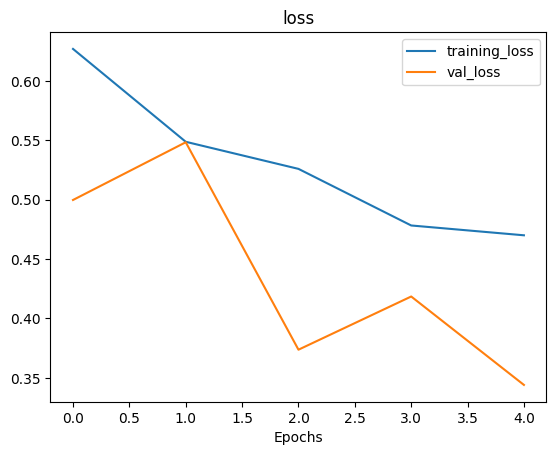

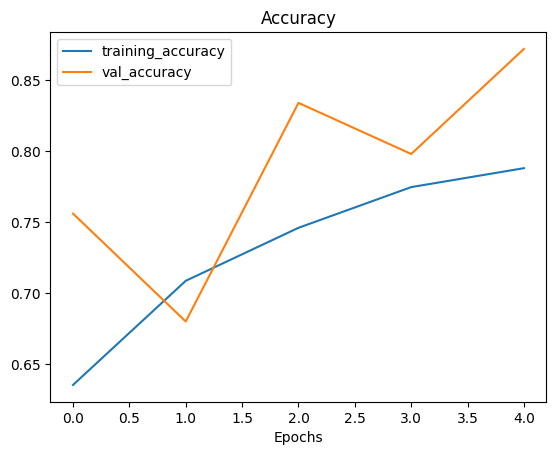

In [62]:
plot_loss_curves(history_8)

In [59]:
plot_loss_curves(history_1)

NameError: name 'history_1' is not defined

Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

Perhaps that's something you like to try?

### **Making a prediction with our trained model**


In [63]:
print(class_names)

['pizza' 'steak']


The first test image we're going to use is [a delicious steak](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg) I cooked the other day.

--2024-11-10 16:39:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  6.11MB/s    in 0.3s    

2024-11-10 16:39:37 (6.11 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



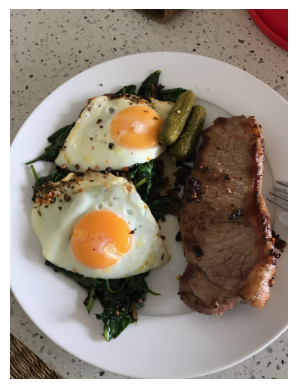

In [64]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [65]:
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and turning it into a tensor).

> 🔑 **Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [66]:
# create func to import img and resize it
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  img = tf.io.read_file(filename)
  # decode to tensor and check 3 colours
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [67]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [68]:
model_8.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
  • training=False
  • mask=None

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [69]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [70]:
pred = model_8.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


array([[0.8371708]], dtype=float32)

In [71]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [72]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [73]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Predcition: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


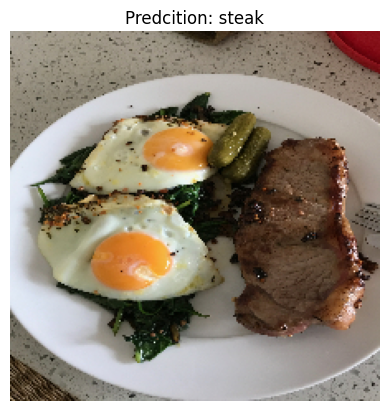

In [74]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2024-11-10 16:48:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  8.92MB/s    in 0.3s    

2024-11-10 16:48:12 (8.92 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


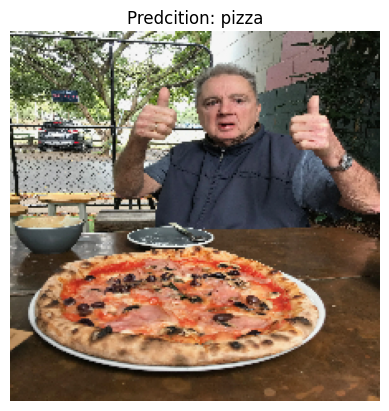

In [75]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

 ## **Multi-class Classification**

 ![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)

In [76]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")

zip_ref.extractall()
zip_ref.close()


--2024-11-10 16:51:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  25.8MB/s    in 20s     

2024-11-10 16:52:11 (24.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [78]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [79]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [81]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (382, 512, 3)


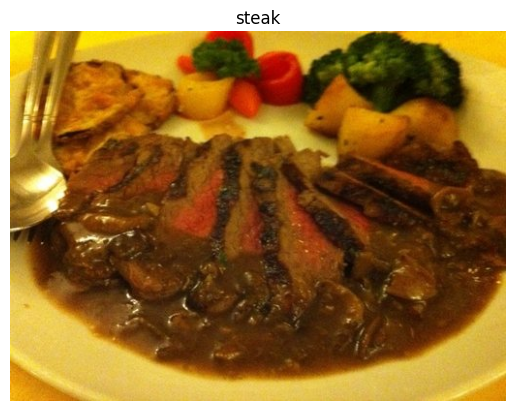

In [82]:
import random
img= view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [87]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          validation_data=test_data,
 )

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.2176 - loss: 2.1530 - val_accuracy: 0.3076 - val_loss: 1.9857
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.4072 - loss: 1.7681 - val_accuracy: 0.3524 - val_loss: 1.8481
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.5438 - loss: 1.4152 - val_accuracy: 0.3508 - val_loss: 1.8820
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.7002 - loss: 0.9880 - val_accuracy: 0.3252 - val_loss: 2.1553
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.8417 - loss: 0.5770 - val_accuracy: 0.3168 - val_loss: 2.4738


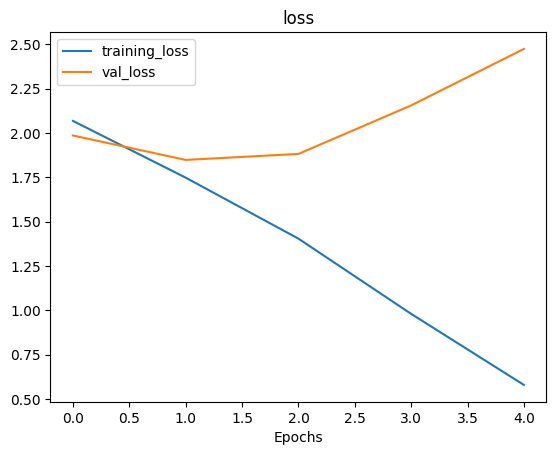

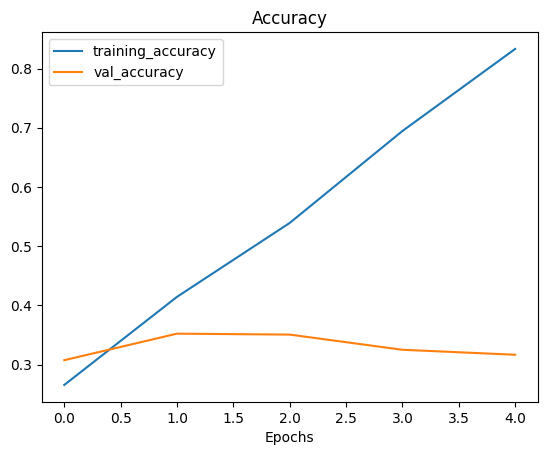

In [88]:
plot_loss_curves(history_10)

> it is supposed to build the model and train our data but for learning purpose we will augument data directly and build the model with all enhancmement

In [85]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now that we have augmented data, let's test it with the same model (`model_10`).

Instead of rebuilding the model, we can use TensorFlow’s [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) function to make a copy. The copy won't have any learned weights, so it’s like starting fresh.

> 🔑 **Note:** In machine learning, it’s important to experiment by trying different things. We're using the same model but with new data to see if augmented data improves performance.


In [89]:
model_11 = tf.keras.models.clone_model(model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          validation_data=test_data,
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.1794 - loss: 2.2308 - val_accuracy: 0.2984 - val_loss: 2.0043
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.2687 - loss: 2.0676 - val_accuracy: 0.3524 - val_loss: 1.8800
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.3151 - loss: 1.9620 - val_accuracy: 0.3804 - val_loss: 1.8177
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.3244 - loss: 1.9276 - val_accuracy: 0.3952 - val_loss: 1.7981
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.3322 - loss: 1.9295 - val_accuracy: 0.3996 - val_loss: 1.7514


Each epoch is taking longer with the augmented data because the augmentation happens on the CPU as the data is loaded to the GPU.

> **Note:** To speed this up, you can use augmentation layers directly in the model (e.g., [`RandomFlip`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip)) or use the newer [`image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) API to load images faster.

How do our model’s training curves look?


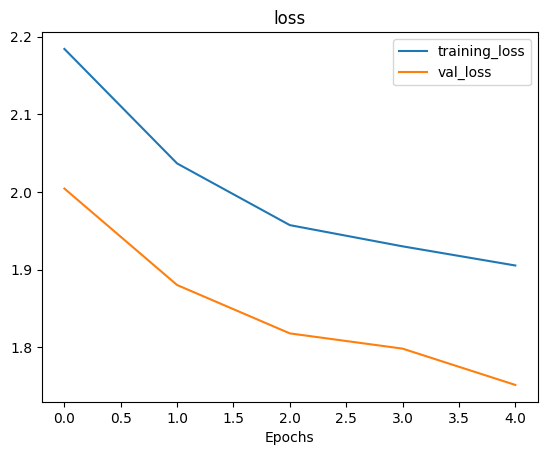

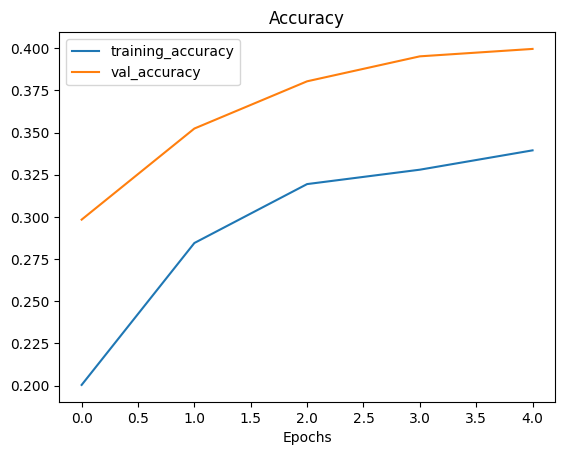

In [90]:
plot_loss_curves(history_11)

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

#### Keep improving

We could keep improving the model by adding more layers, changing settings, or training longer, but this takes time.

Instead, we can try **transfer learning** to use a pre-trained model for our task.

We'll explore that in the next notebook. For now, let's make a prediction with our trained model.


In [91]:
# making predictions
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [92]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


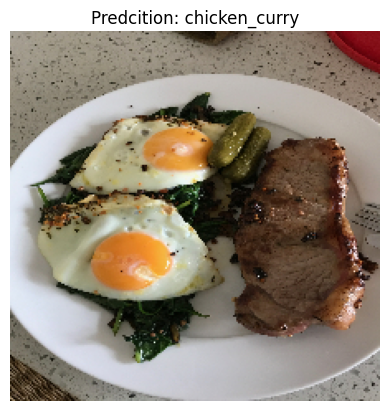

In [94]:
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


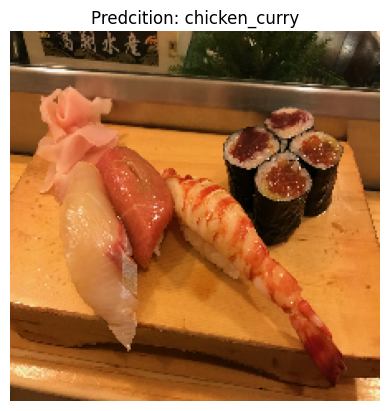

In [95]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


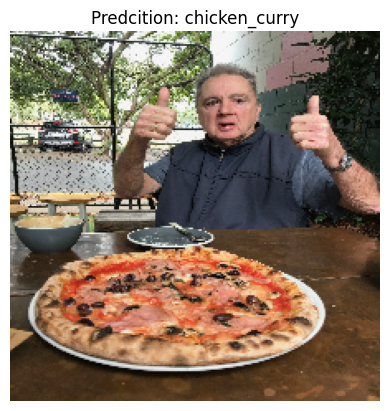

In [96]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


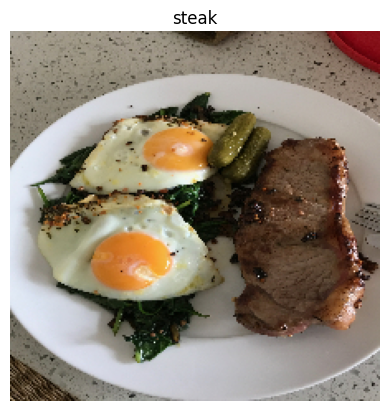

In [97]:
img = load_and_prep_image("03-steak.jpeg")

pred= model_11.predict(tf.expand_dims(img, axis=0))

pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [98]:
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[0.06365779, 0.06180921, 0.06185799, 0.19365087, 0.0710803 ,
        0.091062  , 0.01857076, 0.12361364, 0.2271945 , 0.08750293]],
      dtype=float32)

In [99]:
class_names[pred.argmax()]

'steak'

In [100]:
# adj last version
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Predictions: {pred_class}")
  plt.axis(False);


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


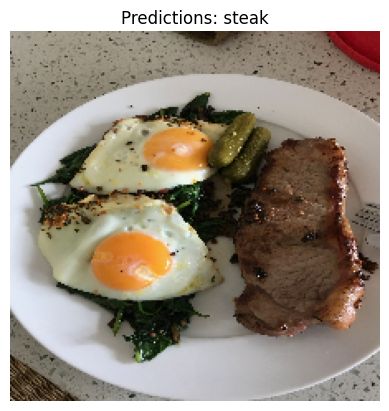

In [101]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


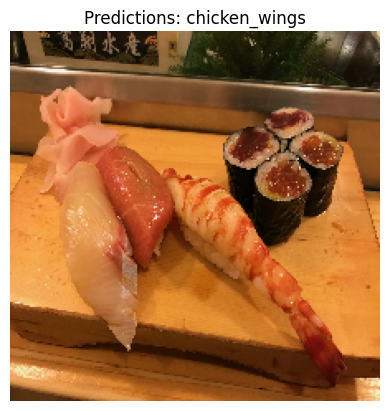

In [102]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


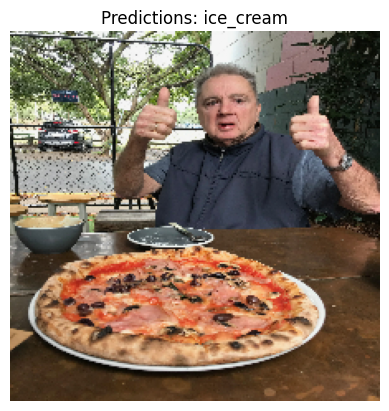

In [103]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

#### Saving and loading our model

Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) and [`load_model`](https://www.tensorflow.org/tutorials/keras/save_and_load) functions.

In [106]:
model_11.save("saved_trained_model.keras")


In [108]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model.keras")
loaded_model_11.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 462ms/step - accuracy: 0.3805 - loss: 1.7800


[1.7513673305511475, 0.39959999918937683]

In [109]:
model_11.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 396ms/step - accuracy: 0.4068 - loss: 1.7389


[1.7513673305511475, 0.39959999918937683]

## 📖 Extra-curriculum

1. **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.

2. **Watch:** Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use **batches** to train models, this technical overview covers many of the reasons why.

3. **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing.

4. **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.

5. **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.